In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#Load MIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


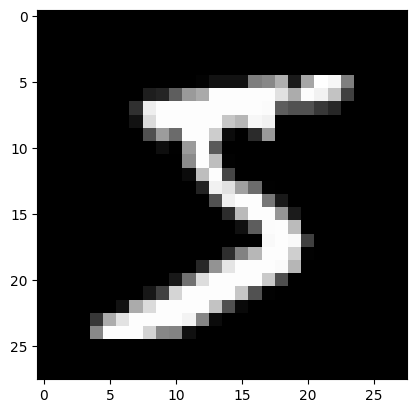

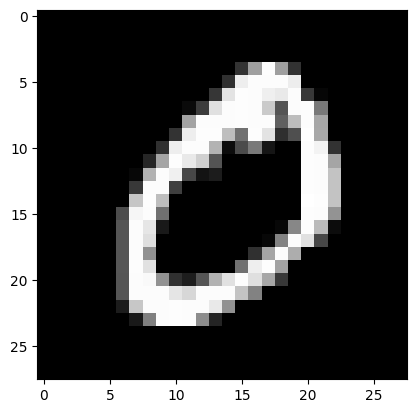

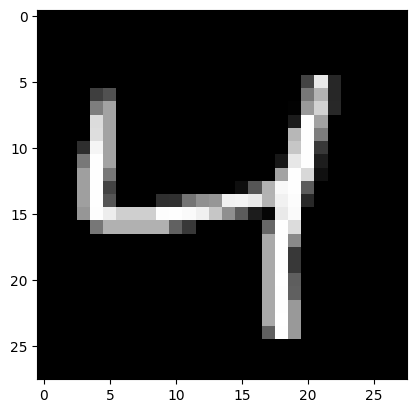

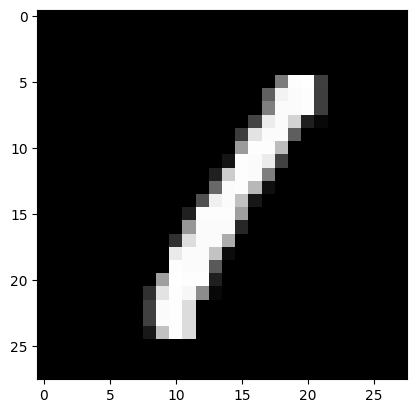

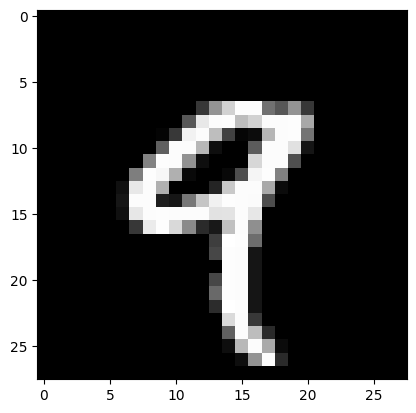

In [ ]:

import matplotlib.pyplot as plt

gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()


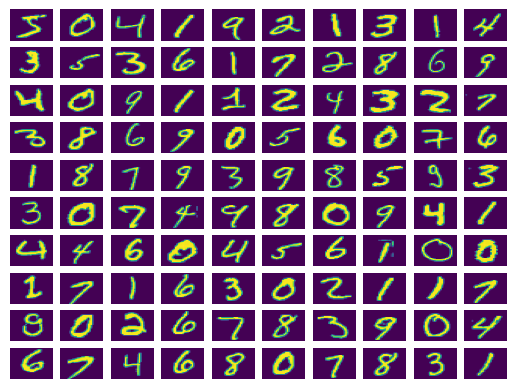

In [ ]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect = 'auto')
        ax[i][j].axis('off')
        k += 1
plt.show()

In [ ]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='sigmoid'),
        Dense(128, activation='sigmoid'),
        Dense(10, activation='sigmoid'),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9861 - loss: 0.0533 - val_accuracy: 0.9725 - val_loss: 0.0910
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9875 - loss: 0.0499 - val_accuracy: 0.9725 - val_loss: 0.0902
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9885 - loss: 0.0448 - val_accuracy: 0.9725 - val_loss: 0.0880
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9896 - loss: 0.0408 - val_accuracy: 0.9739 - val_loss: 0.0877
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9912 - loss: 0.0371 - val_accuracy: 0.9751 - val_loss: 0.0838
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9926 - loss: 0.0341 - val_accuracy: 0.9747 - val_loss: 0.0847
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9930 - loss: 0.0311 - val_accuracy: 0.9744 - val_loss: 0.0859
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9940 - loss: 0.0270 - val_accuracy: 0.9753 - v

In [ ]:
results = model.evaluate(x_test, y_test, verbose=1)
print('test loss, test accuracy:', results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0778
test loss, test accuracy: [0.06840723752975464, 0.9801999926567078]


In [ ]:
model.predict(x_train[0].reshape(1, 28, 28))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[7.9661105e-03, 5.1301962e-01, 7.9988167e-03, 9.9725175e-01,
        5.2392785e-04, 9.9997151e-01, 3.9777430e-03, 1.1845694e-01,
        8.3706714e-03, 1.4398865e-02]], dtype=float32)